In [1]:
import skvideo.io
import keras.backend as K
from keras.models import Sequential, Model
from keras.utils.data_utils import get_file
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv3D, MaxPooling3D, ZeroPadding3D
import numpy as np
from os.path import isfile, join
import numpy as np
import pandas as pd
import cv2
import math
import matplotlib.pyplot as plt   
from skimage.transform import resize
import keras
from keras.layers import Dense, Flatten, Conv3D, MaxPooling3D, Dropout, BatchNormalization
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import h5py
import tensorflow as tf
from keras import backend as K
K.clear_session()
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   #if like me you do not have a lot of memory in your GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "" #then these two lines force keras to use your CPU
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:
count = 0
videoFile = "/home/til/Video/data/Fun2.mp4"
videoCapture = cv2.VideoCapture(videoFile)   # capturing the video from the given path
frameRate = videoCapture.get(5) # frame rate say for every 5 second
x=1
while(videoCapture.isOpened()):
    frameId = videoCapture.get(1) #current frame number
    ret, frame = videoCapture.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="/home/til/Video/code/Images/frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
videoCapture.release()

In [15]:
from PIL import Image
import os, sys
path = "/home/til/Video/code/Images/"
path1 = "/home/til/Video/code/resize/"
dirs = sorted(os.listdir( path ))
print (dirs)
def resize():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item).convert("RGB")
            f, e = os.path.splitext(path+item)
            imResize = im.resize((96,64), Image.ANTIALIAS)
            imResize.save(f + '.jpg', 'JPEG', quality=90)

resize()

['frame0.jpg', 'frame1.jpg', 'frame10.jpg', 'frame11.jpg', 'frame12.jpg', 'frame13.jpg', 'frame14.jpg', 'frame15.jpg', 'frame16.jpg', 'frame17.jpg', 'frame18.jpg', 'frame19.jpg', 'frame2.jpg', 'frame20.jpg', 'frame21.jpg', 'frame22.jpg', 'frame23.jpg', 'frame24.jpg', 'frame25.jpg', 'frame26.jpg', 'frame27.jpg', 'frame28.jpg', 'frame29.jpg', 'frame3.jpg', 'frame30.jpg', 'frame31.jpg', 'frame32.jpg', 'frame33.jpg', 'frame34.jpg', 'frame35.jpg', 'frame36.jpg', 'frame37.jpg', 'frame38.jpg', 'frame39.jpg', 'frame4.jpg', 'frame40.jpg', 'frame41.jpg', 'frame42.jpg', 'frame43.jpg', 'frame44.jpg', 'frame45.jpg', 'frame46.jpg', 'frame47.jpg', 'frame48.jpg', 'frame49.jpg', 'frame5.jpg', 'frame50.jpg', 'frame51.jpg', 'frame52.jpg', 'frame53.jpg', 'frame54.jpg', 'frame55.jpg', 'frame56.jpg', 'frame57.jpg', 'frame58.jpg', 'frame59.jpg', 'frame6.jpg', 'frame60.jpg', 'frame61.jpg', 'frame62.jpg', 'frame7.jpg', 'frame8.jpg', 'frame9.jpg']


In [16]:
from keras.preprocessing.image import load_img
# load the image
img = load_img('/home/til/Video/code/Images/frame1.jpg')
# report details about the image
print(type(img))
print(img.format)
print(img.mode)
print(img.size)
# show the image
img.show()

<class 'PIL.JpegImagePlugin.JpegImageFile'>
JPEG
RGB
(96, 64)


In [63]:
images = []
for item in dirs:
    if os.path.isfile(path+item):
        img =  cv2.imread(path+item)
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        X = np.array(img_gray)
        X = X.astype('float32')
        #Normalize X
        X /= 255.0

        images.append(X)
    
    
# convert to RGB, if needed
   # img = img.convert('RGB')
# convert to array
   
  
    
images = np.array(images)

In [64]:
print(images.shape)

(63, 64, 96)


In [65]:
 x_train = images


In [66]:
import os
import sys
import random
import warnings
from pylab import imshow, show, get_cmap

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tqdm import tqdm
from itertools import chain
import skimage
from PIL import Image
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.util import crop, pad
from skimage.morphology import label

from keras.models import Model, load_model, Sequential
from keras.layers import Input, Dense, UpSampling2D, Flatten, Reshape
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, Callback
from keras import backend as K
import tensorflow as tf

warnings.filterwarnings('ignore', category=UserWarning, module='skimage')
seed = 42
random.seed = seed
np.random.seed = seed


In [67]:
    IMG_WIDTH = 96
    IMG_HEIGHT = 64
    IMG_CHANNELS = 3

In [69]:
INPUT_SHAPE = (64, 96, 1) 

In [70]:
from keras.layers import Input, Dense, UpSampling2D, Flatten, Reshape

def Encoder():
    inp = Input(shape=INPUT_SHAPE)
    x = Conv2D(128, (4, 4), activation='elu', padding='same',name='encode1')(inp)
    x = Conv2D(64, (3, 3), activation='elu', padding='same',name='encode2')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(64, (3, 3), activation='elu', padding='same',name='encode3')(x)
    x = Conv2D(32, (2, 2), activation='elu', padding='same',name='encode4')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(64, (3, 3), activation='elu', padding='same',name='encode5')(x)
    x = Conv2D(32, (2, 2), activation='elu', padding='same',name='encode6')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(64, (3, 3), activation='elu', padding='same',name='encode7')(x)
    x = Conv2D(32, (2, 2), activation='elu', padding='same',name='encode8')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(32, (3, 3), activation='elu', padding='same',name='encode9')(x)
    x = Flatten()(x)
    x = Dense(256, activation='elu',name='encode10')(x)
    encoded = Dense(128, activation='sigmoid',name='encode11')(x)
    return Model(inp, encoded)

encoder = Encoder()
encoder.summary()


Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 64, 96, 1)         0         
_________________________________________________________________
encode1 (Conv2D)             (None, 64, 96, 128)       2176      
_________________________________________________________________
encode2 (Conv2D)             (None, 64, 96, 64)        73792     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 32, 48, 64)        0         
_________________________________________________________________
encode3 (Conv2D)             (None, 32, 48, 64)        36928     
_________________________________________________________________
encode4 (Conv2D)             (None, 32, 48, 32)        8224      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 24, 32)        0   

In [73]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=4, 
                                            verbose=1, 
                                            factor=0.5,
                                            min_lr=0.00001)

checkpoint = ModelCheckpoint("Dancer_Auto_Model.hdf5",
                             save_best_only=True,
                             monitor='val_loss',
                             mode='min')

early_stopping = EarlyStopping(monitor='val_loss',
                              patience=8,
                              verbose=1,
                              mode='min',
                              restore_best_weights=True)

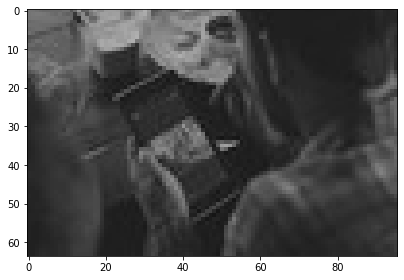

In [74]:
class ImgSample(Callback):

    def __init__(self):
       super(Callback, self).__init__() 

    def on_epoch_end(self, epoch, logs={}):
        sample_img = x_train[50]
        sample_img = sample_img.reshape(1, IMG_HEIGHT, IMG_WIDTH, 1)
        sample_img = self.model.predict(sample_img)[0]
        imshow(sample_img.reshape(IMG_HEIGHT,IMG_WIDTH))
        plt.show()


imgsample = ImgSample()
model_callbacks = [learning_rate_reduction, checkpoint, early_stopping, imgsample]
imshow(x_train[50].reshape(IMG_HEIGHT,IMG_WIDTH))

In [82]:
encoder = Encoder()


encoder.load_weights("Auto_Weights.hdf5", by_name=True)




encoder.save('Encoder_Model.hdf5')

decoder.save_weights("Decoder_Weights.hdf5")
encoder.save_weights("Encoder_Weights.hdf5")

In [84]:
encoder_imgs = encoder.predict(x1)
print(encoder_imgs.shape)
np.save('Encoded.npy',encoder_imgs)

(63, 128)


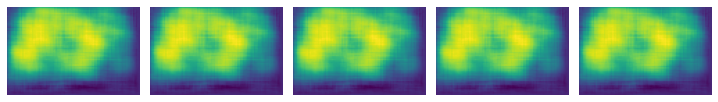

In [85]:
decoded_imgs = decoder.predict(encoder_imgs[0:11])

plt.figure(figsize=(20, 4))
for i in range(5,10):
    # reconstruction
    plt.subplot(1, 10, i + 1)
    plt.imshow(decoded_imgs[i].reshape(IMG_HEIGHT, IMG_WIDTH))
    plt.axis('off')
 
plt.tight_layout()
plt.show()

In [87]:
 Data = encoder_imgs

In [89]:
TRAIN_SIZE = Data.shape[0]
INPUT_SIZE = Data.shape[1]
SEQUENCE_LENGTH = 20

X_train = np.zeros((TRAIN_SIZE-SEQUENCE_LENGTH, SEQUENCE_LENGTH, INPUT_SIZE), dtype='float32')
Y_train = np.zeros((TRAIN_SIZE-SEQUENCE_LENGTH, INPUT_SIZE), dtype='float32')
for i in range(0, TRAIN_SIZE-SEQUENCE_LENGTH, 1 ): 
    X_train[i] = Data[i:i + SEQUENCE_LENGTH]
    Y_train[i] = Data[i + SEQUENCE_LENGTH]

print(X_train.shape)
print(Y_train.shape)

(43, 20, 128)
(43, 128)


In [96]:
import numpy as np
import pandas as pd
import keras as K
import random
import sqlite3
import cv2
import os

from skimage.color import rgb2gray, gray2rgb
from skimage.transform import resize
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

from keras.layers import Input, Dropout, Dense, concatenate, Embedding
from keras.layers import Flatten, Activation
from keras.optimizers import Adam
from keras.models import Model
from keras.utils import np_utils

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.models import load_model
from keras.layers import LSTM, CuDNNGRU, CuDNNLSTM
from keras.layers import MaxPooling1D
from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
from tensorflow.python.compiler.tensorrt import trt_convert as trt
import warnings
warnings.filterwarnings('ignore')

In [98]:


def get_model():
    inp = Input(shape=(SEQUENCE_LENGTH, INPUT_SIZE))
    x = LSTM(512, return_sequences=True,)(inp)
    x = LSTM(256, return_sequences=True,)(x)
    x = LSTM(512, return_sequences=True,)(x)
    x = LSTM(256, return_sequences=True,)(x)
    x = LSTM(512, return_sequences=True,)(x)
    x = LSTM(1024,)(x)
    x = Dense(512, activation="elu")(x)
    x = Dense(256, activation="elu")(x)
    outp = Dense(INPUT_SIZE, activation='sigmoid')(x)
    
    model = Model(inputs=inp, outputs=outp)
    model.compile(loss='mse',
                  optimizer=Adam(lr=0.0002),
                  metrics=['accuracy'],
                 )

    return model

model = get_model()

model.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 20, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 20, 512)           1312768   
_________________________________________________________________
lstm_2 (LSTM)                (None, 20, 256)           787456    
_________________________________________________________________
lstm_3 (LSTM)                (None, 20, 512)           1574912   
_________________________________________________________________
lstm_4 (LSTM)                (None, 20, 256)           787456    
_________________________________________________________________
lstm_5 (LSTM)                (None, 20, 512)           1574912   
_________________________________________________________________
lstm_6 (LSTM)                (None, 1024)              629

In [99]:

filepath="RNN_Model.hdf5"

checkpoint = ModelCheckpoint(filepath,
                             monitor='loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')

early = EarlyStopping(monitor="loss",
                      mode="min",
                      patience=3,
                     restore_best_weights=True)

In [100]:
model_callbacks = [checkpoint, early]
model.fit(X_train, Y_train,
          batch_size=64,
          epochs=60,
          verbose=2,
          callbacks = model_callbacks)


Epoch 1/60
 - 1s - loss: 0.0746 - accuracy: 0.0000e+00

Epoch 00001: loss improved from inf to 0.07459, saving model to RNN_Model.hdf5
Epoch 2/60
 - 0s - loss: 0.0730 - accuracy: 0.0000e+00

Epoch 00002: loss improved from 0.07459 to 0.07300, saving model to RNN_Model.hdf5
Epoch 3/60
 - 0s - loss: 0.0703 - accuracy: 0.0000e+00

Epoch 00003: loss improved from 0.07300 to 0.07026, saving model to RNN_Model.hdf5
Epoch 4/60
 - 0s - loss: 0.0651 - accuracy: 1.0000

Epoch 00004: loss improved from 0.07026 to 0.06509, saving model to RNN_Model.hdf5
Epoch 5/60
 - 0s - loss: 0.0561 - accuracy: 1.0000

Epoch 00005: loss improved from 0.06509 to 0.05613, saving model to RNN_Model.hdf5
Epoch 6/60
 - 0s - loss: 0.0427 - accuracy: 1.0000

Epoch 00006: loss improved from 0.05613 to 0.04269, saving model to RNN_Model.hdf5
Epoch 7/60
 - 0s - loss: 0.0295 - accuracy: 1.0000

Epoch 00007: loss improved from 0.04269 to 0.02949, saving model to RNN_Model.hdf5
Epoch 8/60
 - 0s - loss: 0.0211 - accuracy: 1.0

In [101]:
model.save(filepath)
model.save_weights('RNN_Weights.hdf5')
